# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.01418156
Average number of iterations is 121.268.


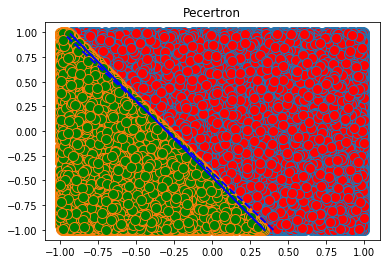

In [37]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = int(1000 * nTrain)
Iter_sum = 0
train_error = 0
test_error = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train = X[:,:nTrain]
    X_test = X[:,nTrain:]
    y_train = y[:,:nTrain]
    y_test = y[:,nTrain:]
    w_g, iters = perceptron(X_train, y_train)
    # Compute training, testing error
    y_train_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    train_error = train_error + np.sum(y_train != y_train_prediction)
    
    y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    test_error = test_error + np.sum(y_test != y_test_prediction)

    # Sum up number of iterations
    Iter_sum = Iter_sum + iters

avgIter = Iter_sum / nRep
E_train = train_error / (nRep * nTrain)
E_test = test_error / (nRep * nTest)
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

In [ ]:
nTrain = 100 # number of training data
nTest = int(1000 * nTrain)
X, y, w_f = mkdata(nTrain + nTest, 'noisy'))
X_train = X[:,:nTrain]
X_test = X[:,nTrain:]
y_train = y[:,:nTrain]
y_test = y[:,nTrain:]
w_g, iters = perceptron(X_train, y_train)

y_train_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
train_error = train_error + np.sum(y_train != y_train_prediction)
    
y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
test_error = test_error + np.sum(y_test != y_test_prediction)

E_train = train_error / nTrain
E_test = test_error / nTest
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')

### Part3: Linear Regression

E_train is 0.03839, E_test is 0.04712971


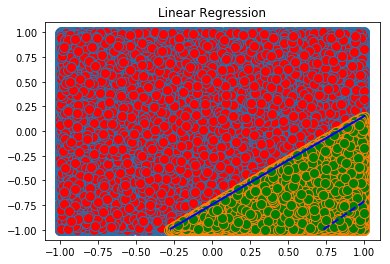

In [22]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = int(1000 * nTrain)
train_error = 0
test_error = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train = X[:,:nTrain]
    X_test = X[:,nTrain:]
    y_train = y[:,:nTrain]
    y_test = y[:,nTrain:]
    w_g = linear_regression(X_train, y_train)
    # Compute training, testing error
    y_train_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    train_error = train_error + np.sum(y_train != y_train_prediction)
    
    y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    test_error = test_error + np.sum(y_test != y_test_prediction)
    
E_train = train_error / (nRep * nTrain)
E_test = test_error / (nRep * nTest)
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression');

## Part4: Linear Regression: noisy

E_train is 0.13257, E_test is 0.14346116


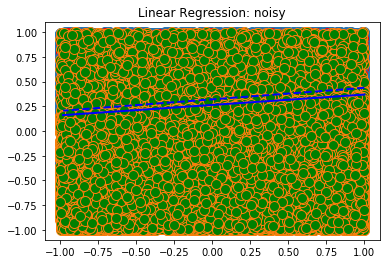

In [25]:
nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = int(1000 * nTrain)
train_error = 0
test_error = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train = X[:,:nTrain]
    X_test = X[:,nTrain:]
    y_train = y[:,:nTrain]
    y_test = y[:,nTrain:]
    w_g = linear_regression(X_train, y_train)
    # Compute training, testing error
    y_train_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    train_error = train_error + np.sum(y_train != y_train_prediction)
    
    y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    test_error = test_error + np.sum(y_test != y_test_prediction)
    
E_train = train_error / (nRep * nTrain)
E_test = test_error / (nRep * nTest)
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [11]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)

# Compute training, testing error
y_prediction = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X))))
E_train = np.sum(y != y_prediction) / y.shape[1]
y_test_prediction = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
E_test = np.sum(y_test != y_test_prediction) / y_test.shape[1]

print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = np.vstack((X[0,:],X[1,:],X[0,:]*X[1,:],X[0,:]*X[0,:],X[1,:]*X[1,:]))
X_test_t = np.vstack((X_test[0,:],X_test[1,:],X_test[0,:]*X_test[1,:],X_test[0,:]*X_test[0,:],X_test[1,:]*X_test[1,:]))
w = linear_regression(X_t, y)

# Compute training, testing error
y_t_prediction = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_t.shape[1])), X_t))))
E_train = np.sum(y != y_t_prediction) / y.shape[1]
y_test_t_prediction = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t))))
E_test = np.sum(y_test != y_test_t_prediction) / y_test.shape[1]

print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.0136, E_test is 0.0252132


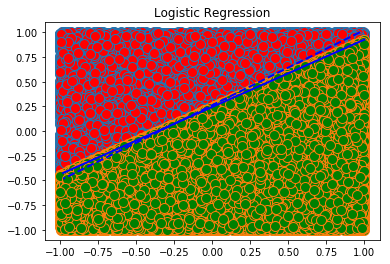

In [32]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = int(1000 * nTrain)
train_error = 0
test_error = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train = X[:,:nTrain]
    X_test = X[:,nTrain:]
    y_train = y[:,:nTrain]
    y_test = y[:,nTrain:]
    w_g = logistic(X_train, y_train)
    
    # Compute training, testing error
    y_train_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    train_error = train_error + np.sum(y_train != y_train_prediction)
    
    y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    test_error = test_error + np.sum(y_test != y_test_prediction)

E_train = train_error / (nRep * nTrain)
E_test = test_error / (nRep * nTest)
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.1273, E_test is 0.137214


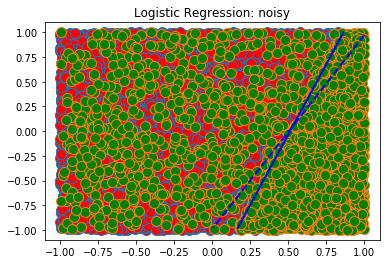

In [35]:
# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of testing data
train_error = 0
test_error = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train = X[:,:nTrain]
    X_test = X[:,nTrain:]
    y_train = y[:,:nTrain]
    y_test = y[:,nTrain:]
    w_g = logistic(X_train, y_train)
    
    # Compute training, testing error
    y_train_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    train_error = train_error + np.sum(y_train != y_train_prediction)
    
    y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    test_error = test_error + np.sum(y_test != y_test_prediction)

E_train = train_error / (nRep * nTrain)
E_test = test_error / (nRep * nTest)
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.0112703
Average number of support vectors is 3.287.


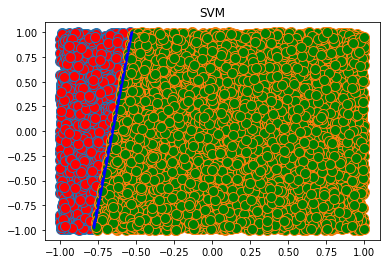

In [22]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of testing data
train_error = 0
test_error = 0
sum_sv = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train = X[:,:nTrain]
    X_test = X[:,nTrain:]
    y_train = y[:,:nTrain]
    y_test = y[:,nTrain:]
    w_g, num_sc = svm(X_train, y_train)
    # Compute training, testing error
    # Sum up number of support vectors
    y_train_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    train_error = train_error + np.sum(y_train != y_train_prediction)
    
    y_test_prediction = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    test_error = test_error + np.sum(y_test != y_test_prediction)
    sum_sv = sum_sv + num_sc

E_train = train_error / (nRep * nTrain)
E_test = test_error / (nRep * nTest)
avgNum = sum_sv / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.